In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Poker cards
Poker uses a standard deck consisting of 52 cards. Each card has a rank and a suite.
There are 13 ranks and 4 suites

To learn more  about poker hands and their probabilities, see here:
[poker probabilities](https://en.wikipedia.org/wiki/Poker_probability)

In [2]:
ranks=['A','2','3','4','5','6','7','8','9','10','J','Q','K']
suits='HSCD' # Hearts, Spades, Clubs Diamonds
cards=[]
for s in suits:
    for r in ranks:
        cards.append((r,s))
print 'Number of cards=',len(cards),'\nThe first three cards are',cards[:3]

Number of cards= 52 
The first three cards are [('A', 'H'), ('2', 'H'), ('3', 'H')]


In [3]:
hand=random.permutation(cards)[:5]
print hand

[['J' 'C']
 ['9' 'H']
 ['Q' 'C']
 ['7' 'H']
 ['6' 'C']]


## Computing the probability of "single pair"
we will compute the probability of two-of-a-kind (= single pair) in two different ways:

1. Using a simulation to get approximate answers and
2. Using combinatoric to compute an exact answer

### Simulation

In [4]:
def two_of_a_kind(hand):
    counts=count_by_rank(hand)
    return counts[2]==1 and counts[3]==0

In [5]:
def count_by_rank(hand):
    """ 
    Given a hand, compute the number of singles, pairs, triples and 4's
    A 'pair' refers to two cards of the same rank.
    Input: hand: A list of cards, each card has the form (rank,suit)
    Output: a dictionary that maps 1,2,3,4 to the number of ranks with that number of suits.
    """
    D={}
    for rank,suit in hand:
        if rank not in D:
            D[rank]=0
        D[rank]+=1
    C={i:0 for i in range(1,5)}
    for rank,count in D.items():
        C[count]+=1
    return C

hand=[(6,s) for s in suits]+[(7,'H')]
print hand
count_by_rank(hand)

[(6, 'H'), (6, 'S'), (6, 'C'), (6, 'D'), (7, 'H')]


{1: 1, 2: 0, 3: 0, 4: 1}

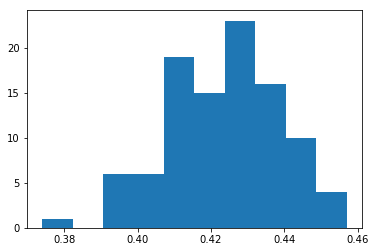

In [6]:
def calc_prob(cond,n=1000,k=100):
    P_est=[]
    for j in range(k):
        hits=0
        for i in range(n):
            hand=random.permutation(cards)[:5]
            hits+=cond(hand)
        P_est.append(float(hits)/n)
    return P_est

H=calc_prob(two_of_a_kind)
hist(H);

## Using Combinatorics

In [7]:
# calculate the probabilities exactly
from math import exp,factorial
from scipy.special import gammaln

In [8]:
def C(n,k):
    a=gammaln(n+1)-gammaln(k+1)-gammaln(n-k+1)
    return int(round(exp(a)))

C(4,2)

6

In [10]:
#number of ways to choose 5 cards from a standard deck
C(52,5)

2598960

### Compute the probability of  two of a kind
Order of choices:
1. choose the rank of the pair: $13$
2. choose the suits of the pair: $C(4,2)=6$
3. choose the ranks of the three singles: $C(12,3)$
4. choose the suits of the three singles: $4^3$ 

In [11]:
((13.*C(4,2))*C(12,3)*4**3)/C(52,5)

0.4225690276110444

In [12]:
def four_of_a_kind(hand):
    counts=count_by_rank(hand)
    return counts[4]==1

def three_of_a_kind(hand):
    counts=count_by_rank(hand)
    return counts[3]==1 and counts[2]==0

def full_house(hand):  #a two and a three
    counts=count_by_rank(hand)
    return counts[2]==1 and counts[3]==1

